# Long Short-Term Memory (LSTM) Using Darts

## What is LSTM? 

Darts is a python time series forcasting library, we wanted to see what it can do with its implementation of lstm. How much does it differ from ours? Is it better or worse?  what about trainning time?

## Darts LSTM Implementation:

# TODO: change this
Our implementation of the LSTM is available in `./src/lstm.py`. The implementation includes the model as well as all that's needed for the test besnch to be able to use the model. let's check it out:

In [1]:
import src.darts__lstm as lstm
import src.framework__test_bench as tb

[TEST BENCH] Powering on test bench
[TEST BENCH] testing metric='node_mem', app='moc/smaug'.
[TEST BENCH] Fetching data for metric='node_mem', app='moc/smaug'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 10 minutes.


2022-07-16 01:06:34 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 13054 samples.
C:\Users\Andrew\miniconda3\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.025 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
2022-07-16 01:06:34 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-16 01:06:34 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-16 01:06:34 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-16 01:06:34 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-16 01:06:34 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-16 01:06:34 pytorch_lightning.cal

[TEST BENCH] Throwing out data that is less than 13.333333333333334 hours long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BENCH] Amount of train/test data is 61
[TEST BENCH] Making an instance of the class we want to test
[TEST BENCH] Starting training loop


Training: 0it [00:00, ?it/s]

[TEST BENCH] Training took 199.4745376110077 seconds.
[TEST BENCH] Starting testing loop


Predicting: 408it [00:00, ?it/s]

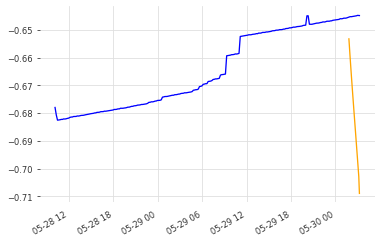

Predicting: 408it [00:00, ?it/s]

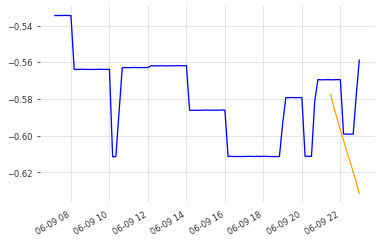

Predicting: 408it [00:00, ?it/s]

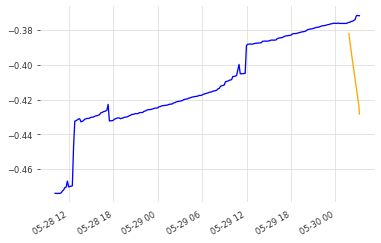

Predicting: 408it [00:00, ?it/s]

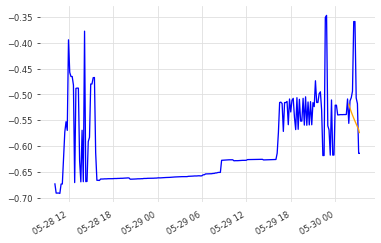

Predicting: 408it [00:00, ?it/s]

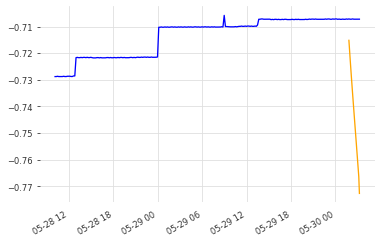

Predicting: 408it [00:00, ?it/s]

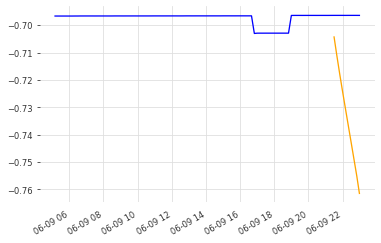

Predicting: 408it [00:00, ?it/s]

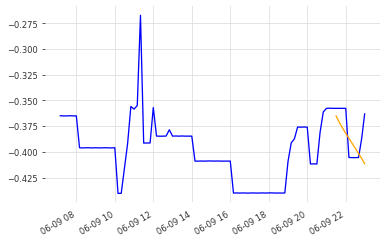

Predicting: 408it [00:00, ?it/s]

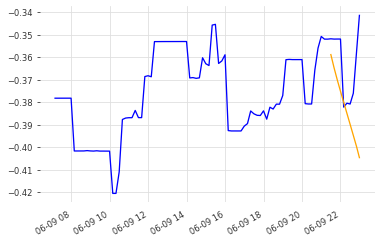

Predicting: 408it [00:00, ?it/s]

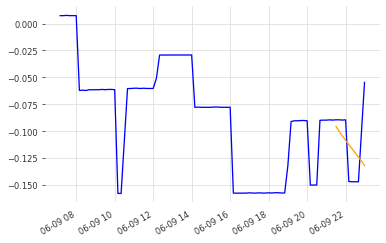

Predicting: 408it [00:00, ?it/s]

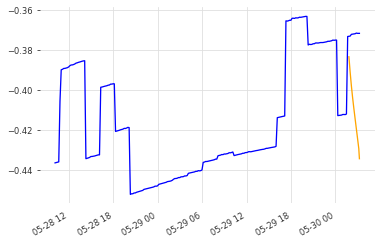

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

Predicting: 408it [00:00, ?it/s]

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='node_mem', app='moc/smaug':
[TEST BENCH] Training time in seconds is             199.4745376110077
[TEST BENCH] Average mse over the test set is        0.0036028564251011077
[TEST BENCH] Average precision over the test set is  0.07285974499089254
[TEST BENCH] Average recall over the test set is     0.0692167577413479
[TEST BENCH] Average F1 over the test set is         0.056206088992974246
[TEST BENCH] Average MASE over the test set is       9.82799692572848
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='node_mem', app='moc/smaug'
[TEST BENCH] testing metric='node_mem', app='emea/balrog'.
[TEST BENCH] Fetching data for metric='node_mem', app='emea/balrog'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 10 minutes.


2022-07-16 01:09:59 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 2064 samples.
C:\Users\Andrew\miniconda3\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.025 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
2022-07-16 01:09:59 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-16 01:09:59 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-16 01:09:59 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-16 01:09:59 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-16 01:09:59 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-16 01:09:59 pytorch_lightning.call

[TEST BENCH] Throwing out data that is less than 13.333333333333334 hours long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BENCH] Amount of train/test data is 24
[TEST BENCH] Making an instance of the class we want to test
[TEST BENCH] Starting training loop


Training: 0it [00:00, ?it/s]

[TEST BENCH] Training took 77.13002276420593 seconds.
[TEST BENCH] Starting testing loop


Predicting: 65it [00:00, ?it/s]

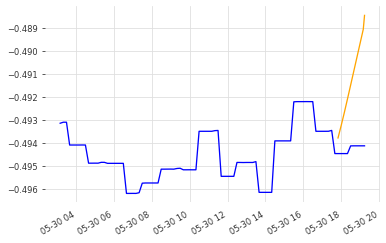

Predicting: 65it [00:00, ?it/s]

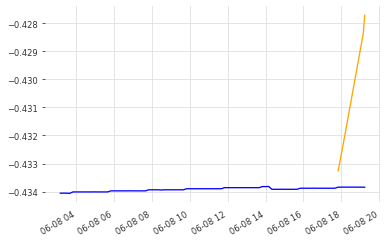

Predicting: 65it [00:00, ?it/s]

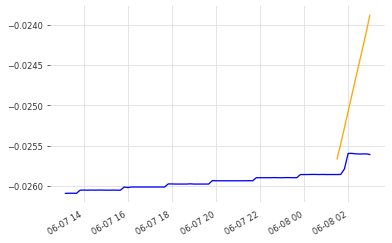

Predicting: 65it [00:00, ?it/s]

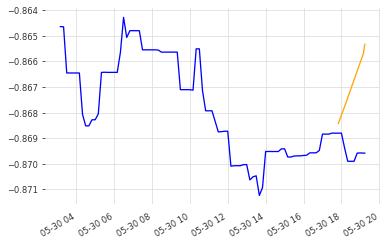

Predicting: 65it [00:00, ?it/s]

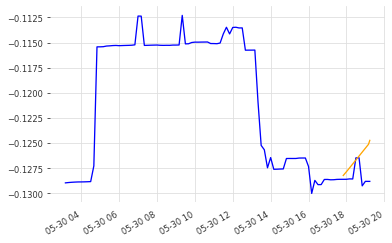

Predicting: 65it [00:00, ?it/s]

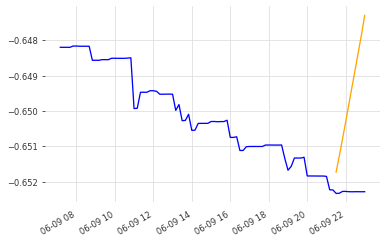

Predicting: 65it [00:00, ?it/s]

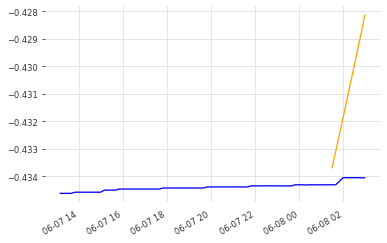

Predicting: 65it [00:00, ?it/s]

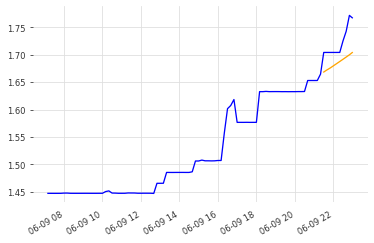

Predicting: 65it [00:00, ?it/s]

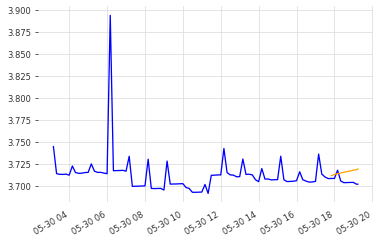

Predicting: 65it [00:00, ?it/s]

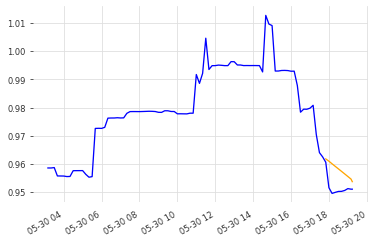

Predicting: 65it [00:00, ?it/s]

Predicting: 65it [00:00, ?it/s]

Predicting: 65it [00:00, ?it/s]

Predicting: 65it [00:00, ?it/s]

Predicting: 65it [00:00, ?it/s]

Predicting: 65it [00:00, ?it/s]

Predicting: 65it [00:00, ?it/s]

Predicting: 65it [00:00, ?it/s]

Predicting: 65it [00:00, ?it/s]

Predicting: 65it [00:00, ?it/s]

Predicting: 65it [00:00, ?it/s]

Predicting: 65it [00:00, ?it/s]

Predicting: 65it [00:00, ?it/s]

Predicting: 65it [00:00, ?it/s]

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='node_mem', app='emea/balrog':
[TEST BENCH] Training time in seconds is             77.13002276420593
[TEST BENCH] Average mse over the test set is        0.00013275086957115117
[TEST BENCH] Average precision over the test set is  0.7645502645502646
[TEST BENCH] Average recall over the test set is     0.9500000000000001
[TEST BENCH] Average F1 over the test set is         0.8419321895424837
[TEST BENCH] Average MASE over the test set is       11.224450479865185
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='node_mem', app='emea/balrog'
[TEST BENCH] testing metric='container_mem', app='nmstate-handler'.
[TEST BENCH] Fetching data for metric='container_mem', app='nmstate-handler'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 10 minutes.
[TEST BENCH] 

2022-07-16 01:11:57 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 268380 samples.
C:\Users\Andrew\miniconda3\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.025 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
2022-07-16 01:11:57 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-16 01:11:57 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-16 01:11:57 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-16 01:11:57 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-16 01:11:57 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-16 01:11:57 pytorch_lightning.ca

Training: 0it [00:00, ?it/s]

In [ ]:
tb = tb.TestBench(
    class_to_test=lstm.DartsLSTMTester,
    path_to_data="./data/"
)
tb.run_training_and_tests()